In [1]:
import os
import sys

sys.path.append(os.path.join(os.getcwd(), ".."))

In [2]:
import time

import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

import manifolds.schwarzschild as sc
from manifolds.geodesic import explicit_step, midpoint_step, make_exp_map_step
from manifolds.manifold import ChartPoint, Cotangent, ContravariantTensor, CovariantTensor, Tangent, Tensor
from manifolds.riemannian import levi_civita

In [3]:
%matplotlib widget

In [4]:
spacetime = sc.SchwarzschildSpacetime(2.)

In [5]:
exp_map_step = make_exp_map_step(lambda cp: levi_civita(spacetime, cp), midpoint_step, sc.SchwarzschildChart)

In [6]:
p = sc.SchwarzschildPoint(jnp.array([0., 20., 0., 0.]))
spacetime.metric(p)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


PseudoMetric(point=ChartPoint(coords=Array([ 0., 20.,  0.,  0.], dtype=float32), chart=<manifolds.schwarzschild.SchwarzschildChart object at 0x7fa2606fc1d0>), t_coords=Array([[-0.9      ,  0.       ,  0.       ,  0.       ],
       [ 0.       ,  1.1111112,  0.       ,  0.       ],
       [ 0.       ,  0.       ,  1.       ,  0.       ],
       [ 0.       ,  0.       ,  0.       ,  1.       ]], dtype=float32), n_contra=2)

In [7]:
x_coords = jnp.array([0., 20., 0., 0.])  # object at 10x Schwarzschild radius in x direction
v_coords = jnp.array([1., 0., 0.1, 0.15])
chart_coords = spacetime.preferred_chart(sc.SchwarzschildPoint(x_coords)).to_array()
dt = jnp.array(0.05)

history = []
for outer in range(200):
    for inner in range(100):
        x_coords, v_coords = exp_map_step(x_coords, v_coords, chart_coords, dt)
    history.append(x_coords.tolist())

print(x_coords, v_coords)

[1052.0898     -10.062642     3.7234368    5.585158 ] [ 1.07193    -0.07121143 -0.1724057  -0.25860885]


(-25.0, 25.0)

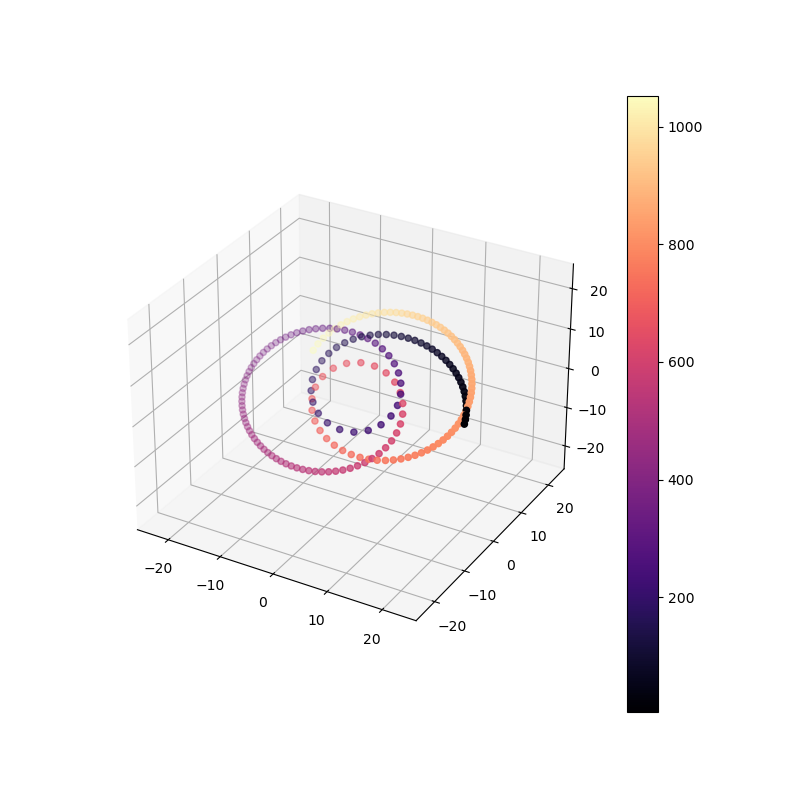

In [8]:
coord_range = [-25, 25]

fig = plt.figure(figsize=(8,8))
ax2 = fig.add_subplot(1, 1, 1, projection="3d")
hist_embedded = np.array([sc.SchwarzschildChart(2.).coords_to_point(jnp.array(x)).coords for x in history])
plot = ax2.scatter(hist_embedded[:, 1], hist_embedded[:, 2], hist_embedded[:, 3], c=hist_embedded[:, 0], cmap="magma")
fig.colorbar(plot)
ax2.set_xlim(coord_range)
ax2.set_ylim(coord_range)
ax2.set_zlim(coord_range)